**---------------------Library---------------------**

In [ ]:
import os
import cv2
import numpy as np
import gdal
import glob
import random
import tifffile as tif
from PIL import Image
from __future__ import print_function

import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import model_from_json
from keras.models import load_model

import skimage.io as io
import skimage.transform as trans

import matplotlib.pyplot as plt

Using TensorFlow backend.


**---------------------Data Loading---------------------**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Village Finder-20200608T102453Z-001.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Village Finder/patches_gt/images/0047_81.tif  
  inflating: Village Finder/patches_gt/images/0047_19.tif  
  inflating: Village Finder/patches/images/0039_35.jpg  
  inflating: Village Finder/patches_gt/images/0046_25.tif  
  inflating: Village Finder/patches/images/0047_42.jpg  
  inflating: Village Finder/val_patches/images/0003_71.jpg  
  inflating: Village Finder/patches/images/0045_65.jpg  
  inflating: Village Finder/patches/images/0043_68.jpg  
  inflating: Village Finder/patches_gt/images/0049_79.tif  
  inflating: Village Finder/patches_gt/images/0054_61.tif  
  inflating: Village Finder/patches/images/0044_38.jpg  
  inflating: Village Finder/patches_gt/images/0045_72.tif  
  inflating: Village Finder/patches/images/0034_40.jpg  
  inflating: Village Finder/patches/images/0044_74.jpg  
  inflating: Village Finder/patches_gt/images/0052_69.tif  
  inflating: Village Finder/patches/images/0045_58.jpg  
  inflating:

**---------------------Resizing the data and converting it into png---------------------**

In [ ]:
root_directory_processed_data = os.path.join('/content', 'Processed')
os.mkdir(root_directory_processed_data)

In [ ]:
def resize_and_convert(images_directory, output_folder_name, xdim, ydim, is_mask=False, converting_filetype='.png', is_create_processed_folder=True, logs=True):
  
  #for saving the files to folder
  output_folder = os.path.join(root_directory_processed_data, output_folder_name)
  print("Output Directory: ", output_folder)

  #for the processed folder creation
  if is_create_processed_folder:
    if not (os.path.isdir(output_folder)):
      print("Making Folder: ", output_folder)
      os.mkdir(output_folder)
  
  #for the data processing
  images_names = os.listdir(images_directory)
  dim = (xdim, ydim) #(w, h)
  count = 0
  for index, image in enumerate(images_names):
      count +=1
      #reading images.
      if is_mask:
        read_image = cv2.imread(images_directory + "/" + image, 0)
      else:
        read_image = cv2.imread(images_directory + "/" + image)

      #resizing it.
      resizedImage = cv2.resize(read_image, dim, interpolation=cv2.INTER_AREA)

      if is_mask:
        _, resizedImage = cv2.threshold(resizedImage, 128, 255, cv2.THRESH_BINARY)
    
      #Converting to .png and Storing resized image to a directory
      cv2.imwrite(os.path.join(output_folder, image.split(".")[0] + converting_filetype), resizedImage)
      
      if logs and count % 100 == 0:        
          print("Reading Image : " + image +" with Index : "+ str(index))
          print("Resized and Stored Image : " + image +" with Index : "+ str(index))

In [ ]:
x_train_dir = os.path.join('/content/Village Finder', 'patches/images')
y_train_dir = os.path.join('/content/Village Finder', 'patches_gt/images')

#resizing the training data
resize_and_convert(x_train_dir, 'Training_data', 256, 256)

#resizing the training mask
resize_and_convert(y_train_dir, 'Training_mask', 256, 256, is_mask=True)

Output Directory:  /content/Processed/Training_data
Reading Image : 0013_42.jpg with Index : 99
Resized and Stored Image : 0013_42.jpg with Index : 99
Reading Image : 0034_25.jpg with Index : 199
Resized and Stored Image : 0034_25.jpg with Index : 199
Reading Image : 0036_50.jpg with Index : 299
Resized and Stored Image : 0036_50.jpg with Index : 299
Reading Image : 0047_16.jpg with Index : 399
Resized and Stored Image : 0047_16.jpg with Index : 399
Reading Image : 0027_61.jpg with Index : 499
Resized and Stored Image : 0027_61.jpg with Index : 499
Reading Image : 0053_6.jpg with Index : 599
Resized and Stored Image : 0053_6.jpg with Index : 599
Reading Image : 0024_27.jpg with Index : 699
Resized and Stored Image : 0024_27.jpg with Index : 699
Reading Image : 0055_57.jpg with Index : 799
Resized and Stored Image : 0055_57.jpg with Index : 799
Reading Image : 0009_70.jpg with Index : 899
Resized and Stored Image : 0009_70.jpg with Index : 899
Reading Image : 0038_27.jpg with Index : 99

In [ ]:
x_val_dir = os.path.join('/content/Village Finder', 'val_patches/images')
y_val_dir = os.path.join('/content/Village Finder', 'val_gt/images')

#resizing the validation data
resize_and_convert(x_val_dir, 'Validation_data', 256, 256)

#resizing the validation mask
resize_and_convert(y_val_dir, 'Validation_mask', 256, 256, is_mask=True)

Output Directory:  /content/Processed/Validation_data
Making Folder:  /content/Processed/Validation_data
Reading Image : 0002_61.jpg with Index : 99
Resized and Stored Image : 0002_61.jpg with Index : 99
Reading Image : 0002_58.jpg with Index : 199
Resized and Stored Image : 0002_58.jpg with Index : 199
Reading Image : 0001_44.jpg with Index : 299
Resized and Stored Image : 0001_44.jpg with Index : 299
Output Directory:  /content/Processed/Validation_mask
Making Folder:  /content/Processed/Validation_mask
Reading Image : 0004_14.tif with Index : 99
Resized and Stored Image : 0004_14.tif with Index : 99
Reading Image : 0003_36.tif with Index : 199
Resized and Stored Image : 0003_36.tif with Index : 199
Reading Image : 0004_40.tif with Index : 299
Resized and Stored Image : 0004_40.tif with Index : 299


**Sorting the images on the based on names, as images and their relavent images are not in same positions**

In [ ]:
def convert_image_to_array(input_directory, is_mask=False, logs=True):
  images_collection = []
  #for getting images names
  originalImages = os.listdir(input_directory)
  #for the sorting of images name (A-Z)
  originalImages = sorted(originalImages)

  #for processing
  for index, image in enumerate(originalImages):
      img = Image.open(input_directory + '/' + image)
      arr = np.array(img)
      if is_mask:
        arr = np.expand_dims(arr, -1)

      images_collection.append(arr)

      if logs and index%100 == 0:
          print("Image number : " +str(index))

  print("Processed!")
  return images_collection

In [ ]:
x_train_dir = os.path.join('/content/Processed', 'Training_data')
y_train_dir = os.path.join('/content/Processed', 'Training_mask')

#resizing the training data
sorting_train_x = convert_image_to_array(x_train_dir)

#resizing the training mask
sorting_train_y = convert_image_to_array(y_train_dir, True)

Image number : 0
Image number : 100
Image number : 200
Image number : 300
Image number : 400
Image number : 500
Image number : 600
Image number : 700
Image number : 800
Image number : 900
Image number : 1000
Image number : 1100
Image number : 1200
Image number : 1300
Image number : 1400
Image number : 1500
Image number : 1600
Image number : 1700
Image number : 1800
Image number : 1900
Image number : 2000
Image number : 2100
Image number : 2200
Image number : 2300
Image number : 2400
Image number : 2500
Image number : 2600
Image number : 2700
Image number : 2800
Image number : 2900
Image number : 3000
Image number : 3100
Image number : 3200
Image number : 3300
Image number : 3400
Image number : 3500
Processed!
Image number : 0
Image number : 100
Image number : 200
Image number : 300
Image number : 400
Image number : 500
Image number : 600
Image number : 700
Image number : 800
Image number : 900
Image number : 1000
Image number : 1100
Image number : 1200
Image number : 1300
Image number 

In [ ]:
x_val_dir = os.path.join('/content/Processed', 'Validation_data')
y_val_dir = os.path.join('/content/Processed', 'Validation_mask')

#resizing the validation data
sorting_val_x = convert_image_to_array(x_val_dir)

#resizing the validation mask
sorting_val_y = convert_image_to_array(y_val_dir, True)

Image number : 0
Image number : 100
Image number : 200
Image number : 300
Processed!
Image number : 0
Image number : 100
Image number : 200
Image number : 300
Processed!


In [ ]:
#for converting list into numpy array and printing there deminsions
np_sorted_train_x = np.array(sorting_train_x)
np_sorted_train_y = np.array(sorting_train_y)

np_sorted_val_x = np.array(sorting_val_x)
np_sorted_val_y = np.array(sorting_val_y)

print(np_sorted_train_x.shape)
print(np_sorted_train_y.shape)
print(np_sorted_val_x.shape)
print(np_sorted_val_y.shape)

(3566, 256, 256, 3)
(3566, 256, 256, 1)
(322, 256, 256, 3)
(322, 256, 256, 1)


In [ ]:
#for calculating the mean and standard daviation
#converting data into float
np_sorted_train_x = np_sorted_train_x.astype('float32')
np_sorted_train_y = np_sorted_train_y.astype('float32')
np_sorted_val_x = np_sorted_val_x.astype('float32')
np_sorted_val_y = np_sorted_val_y.astype('float32')

# calculating the mean and standard dev on training set
# (as validation set will also be from the same distribution)
mean = np.mean(np_sorted_train_x)
std = np.std(np_sorted_train_x)

# === normalizing the training set
np_sorted_train_x -= mean
np_sorted_train_x /= std

#normalizing the mask (from 0-1)
np_sorted_train_y /= 255

# === normalizing the validation set
np_sorted_val_x -= mean
np_sorted_val_x /= std

#normalizing the mask (from 0-1)
np_sorted_val_y /= 255

print(mean)
print(std)

print(np_sorted_train_x.shape)
print(np_sorted_train_y.shape)
print(np_sorted_val_x.shape)
print(np_sorted_val_y.shape)

112.64676
50.839893
(3566, 256, 256, 3)
(3566, 256, 256, 1)
(322, 256, 256, 3)
(322, 256, 256, 1)


**---------------------For Model---------------------**

In [ ]:
def castF(x):
    return K.cast(x, K.floatx())

def castB(x):
    return K.cast(x, bool)

def iou_loss_core(true,pred): 
    intersection = true * pred
    notTrue = 1 - true
    union = true + (notTrue * pred)

    return (K.sum(intersection, axis=-1) + K.epsilon()) / (K.sum(union, axis=-1) + K.epsilon())

def IOU(true, pred): 
    tresholds = [0.5 + (i*.05)  for i in range(10)]
    true = K.batch_flatten(true)
    pred = K.batch_flatten(pred)
    pred = castF(K.greater(pred, 0.5))
    trueSum = K.sum(true, axis=-1)
    predSum = K.sum(pred, axis=-1)

    true1 = castF(K.greater(trueSum, 1))    
    pred1 = castF(K.greater(predSum, 1))

    truePositiveMask = castB(true1 * pred1)

    testTrue = tf.boolean_mask(true, truePositiveMask)
    testPred = tf.boolean_mask(pred, truePositiveMask)

    iou = iou_loss_core(testTrue,testPred) 
    truePositives = [castF(K.greater(iou, tres)) for tres in tresholds]

    truePositives = K.mean(K.stack(truePositives, axis=-1), axis=-1)
    truePositives = K.sum(truePositives)

    trueNegatives = (1-true1) * (1 - pred1) 
    trueNegatives = K.sum(trueNegatives) 

    return (truePositives + trueNegatives) / castF(K.shape(true)[0])
  
def focal_loss(gamma=2, alpha=0.75):
    def focal_loss_fixed(y_true, y_pred):#with tensorflow
        eps = 1e-12
        y_pred=K.clip(y_pred,eps,1.-eps)#improve the stability of the focal loss and see issues 1 for more information
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

In [ ]:
def unet(pretrained_weights = None, input_size = (256, 256, 1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = [IOU])
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

**---------------------Main Calling---------------------**

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

myGene = trainGenerator(2, '/content/Processed', 'Training_data','Training_mask', data_gen_args, save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('village_detection.hdf5', monitor='loss', verbose=1, save_best_only=True)
model.fit_generator(myGene, steps_per_epoch=3566, epochs=5, callbacks=[model_checkpoint])

testGene = testGenerator("/content/Processed/Validation_data")
results = model.predict_generator(testGene, 322, verbose=1)
saveResult("/content/Processed/Results", results)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Epoch 1/15
Found 3566 images belonging to 1 classes.
Found 3566 images belonging to 1 classes.
3566/3566 [==============================] - 824s 231ms/step - loss: 0.2687 - IOU: 0.7180

Epoch 00001: loss improved from inf to 0.26875, saving model to village_detection.hdf5
Epoch 2/15
3566/3566 [==============================] - 822s 231ms/step - loss: 0.1709 - IOU: 0.6846

Epoch 00002: loss improved from 0.26875 to 0.17090, saving model to village_detection.hdf5
Epoch 3/15
3566/3566 [==============================] - 822s 231ms/step - loss: 0.1535 - IOU: 0.7252

Epoch 00003: loss improved from 0.17090 to 0.15355, saving model to village_detection.hdf5
Epoch 4/15
3566/3566 [==============================] - 822s 230ms/step - loss: 0.1435 - IOU: 0.7363

Epoch 00004: loss improved from 0.15355 to 0.14350, saving model to village_detection.hdf5
Epoch 5/15
3566/3566 [==============================] - 819s 230ms/step - loss: 0.1368 - IOU: 0.7473

Epoch 00005: loss improved from 0.14350 to 0.1

In [ ]:
results_train =  model.fit(np_sorted_train_x, np_sorted_train_y,
                     batch_size=32, 
                     epochs=10,
                     verbose=2, 
                     shuffle=True,
                     validation_split=0.2,
                     callbacks=[model_checkpoint, tensorboard])

Train on 2852 samples, validate on 714 samples
Epoch 1/10
 - 99s - loss: 0.1535 - IOU: 0.7264 - val_loss: 0.0884 - val_IOU: 0.8234
Epoch 2/10
 - 99s - loss: 0.1486 - IOU: 0.7295 - val_loss: 0.0755 - val_IOU: 0.8147
Epoch 3/10
 - 99s - loss: 0.1391 - IOU: 0.7504 - val_loss: 0.0739 - val_IOU: 0.8046
Epoch 4/10
 - 99s - loss: 0.1367 - IOU: 0.7572 - val_loss: 0.0832 - val_IOU: 0.7762
Epoch 5/10
 - 99s - loss: 0.1380 - IOU: 0.7469 - val_loss: 0.0619 - val_IOU: 0.8671
Epoch 6/10
 - 99s - loss: 0.1326 - IOU: 0.7635 - val_loss: 0.0768 - val_IOU: 0.7946
Epoch 7/10
 - 99s - loss: 0.1327 - IOU: 0.7625 - val_loss: 0.0735 - val_IOU: 0.8042
Epoch 8/10
 - 99s - loss: 0.1275 - IOU: 0.7702 - val_loss: 0.0767 - val_IOU: 0.8454
Epoch 9/10
 - 99s - loss: 0.1308 - IOU: 0.7581 - val_loss: 0.0825 - val_IOU: 0.8512
Epoch 10/10
 - 99s - loss: 0.1281 - IOU: 0.7690 - val_loss: 0.0781 - val_IOU: 0.8215


**-----------------For saving and loading data-----------------**

In [ ]:
#converting model into JSON and saving it
model_json = model.to_json()

with open(os.path.join('/content/drive/My Drive', 'storedModel_2.json'), "w") as json_file:
    json_file.write(model_json)

# serialize weights to H5
model.save_weights(os.path.join('/content/drive/My Drive', "model_weights_2.h5"))

In [ ]:
# load json and create model
json_file = open(os.path.join('/content/drive/My Drive', "storedModel.json"), 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join('/content/drive/My Drive', "model_weights.h5"))
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# load json and create model
json_file = open(os.path.join('/content/drive/My Drive', "storedModel_2.json"), 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join('/content/drive/My Drive', "model_weights_2.h5"))
print("Loaded model from disk")

Loaded model from disk


**----------------Just for visualization----------------**

In [ ]:

model_checkpoint_2 = ModelCheckpoint('visualization.h5', monitor='val_loss', save_best_only=True)
tensorboard_2 = TensorBoard(log_dir='tensorboard2/', write_graph=True, write_images=True)
loaded_model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = [IOU])
history =  loaded_model.fit(np_sorted_train_x, np_sorted_train_y, 
                            batch_size=32, 
                            epochs=5, 
                            verbose=1, 
                            shuffle=True, 
                            validation_split=0.25,
                            callbacks=[model_checkpoint_2, tensorboard_2])

Train on 2674 samples, validate on 892 samples
Epoch 1/5
2674/2674 [==============================] - 102s 38ms/step - loss: 0.1528 - IOU: 0.7262 - val_loss: 0.0825 - val_IOU: 0.7894
Epoch 2/5
2674/2674 [==============================] - 96s 36ms/step - loss: 0.1225 - IOU: 0.7839 - val_loss: 0.0747 - val_IOU: 0.8369
Epoch 3/5
2674/2674 [==============================] - 96s 36ms/step - loss: 0.1172 - IOU: 0.7957 - val_loss: 0.0793 - val_IOU: 0.7915
Epoch 4/5
2674/2674 [==============================] - 96s 36ms/step - loss: 0.1148 - IOU: 0.7997 - val_loss: 0.0822 - val_IOU: 0.7395
Epoch 5/5
2674/2674 [==============================] - 96s 36ms/step - loss: 0.1151 - IOU: 0.7971 - val_loss: 0.0827 - val_IOU: 0.8317


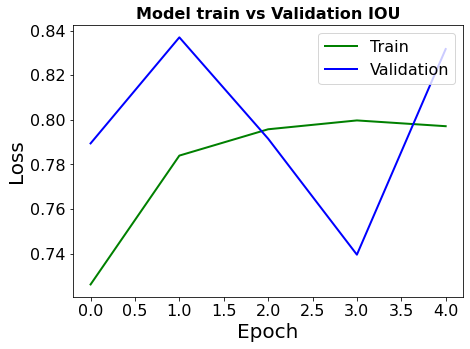

In [ ]:
#for ploting the graph
plt.figure(figsize=(7, 5))
plt.plot(history.history['IOU'], linewidth=2, color='g')                   #visualising training and validation loss curves
plt.plot(history.history['val_IOU'], linewidth=2, color='b')
plt.title('Model train vs Validation IOU', fontsize=16, fontweight="bold")
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

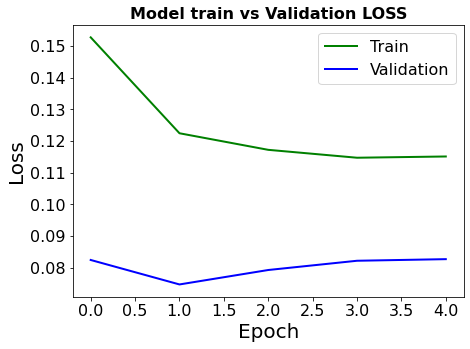

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], linewidth=2, color='g')                   #visualising training and validation loss curves
plt.plot(history.history['val_loss'], linewidth=2, color='b')
plt.title('Model train vs Validation LOSS', fontsize=16, fontweight="bold")
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

322/322 [==============================] - 4s 13ms/step


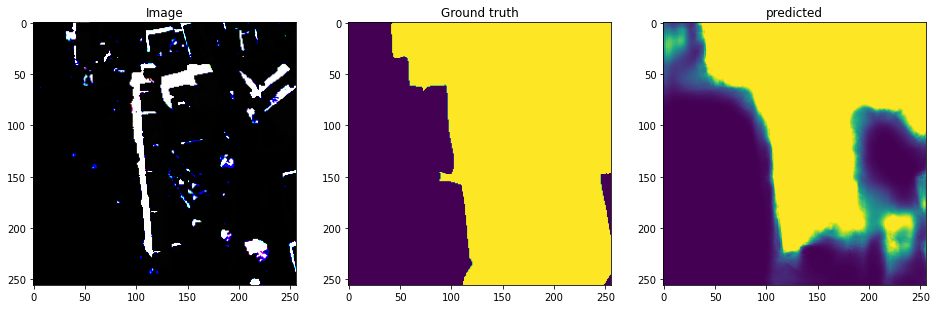

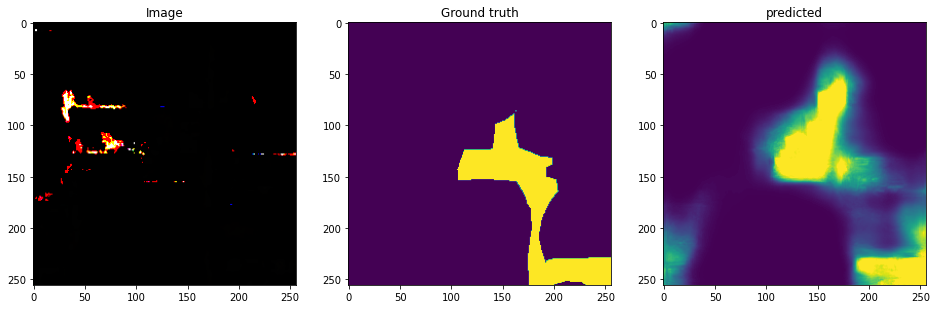

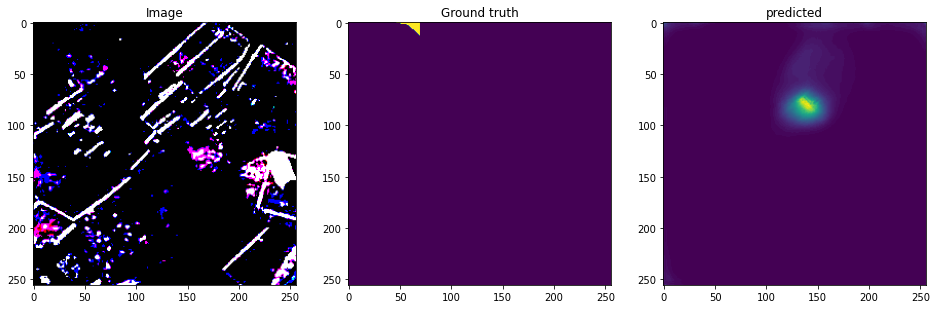

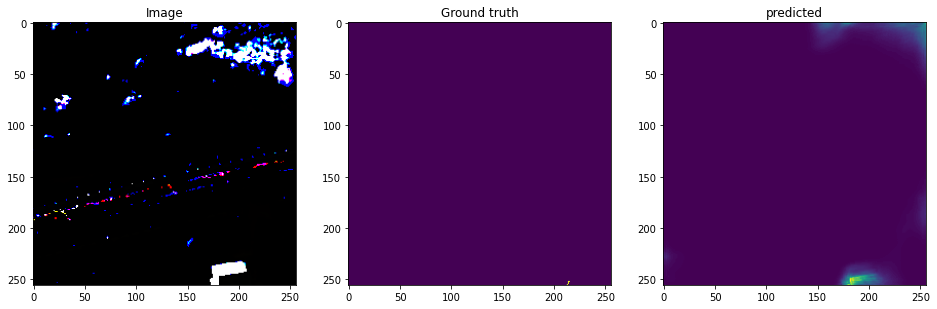

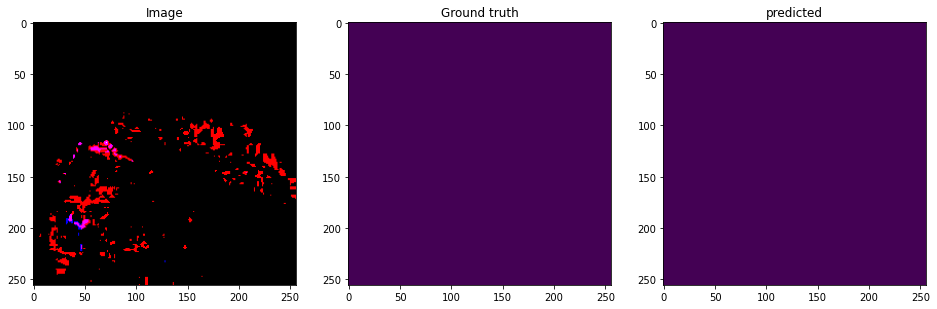

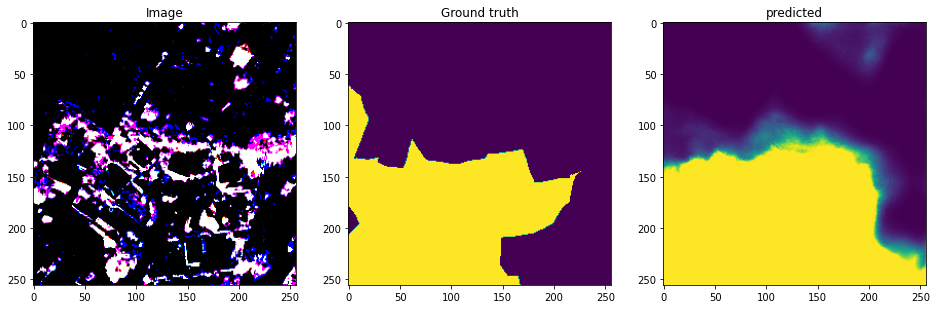

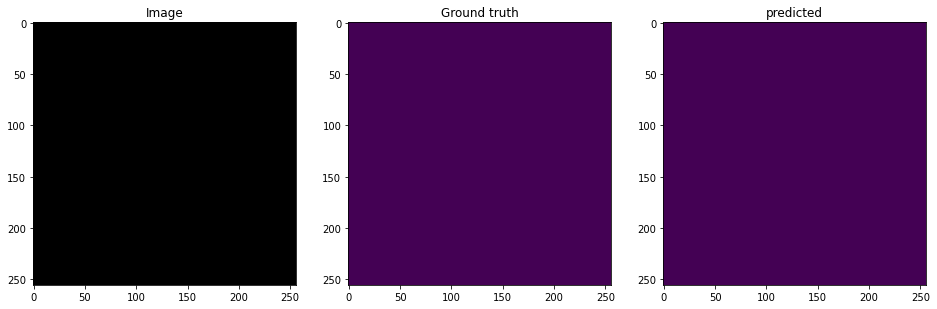

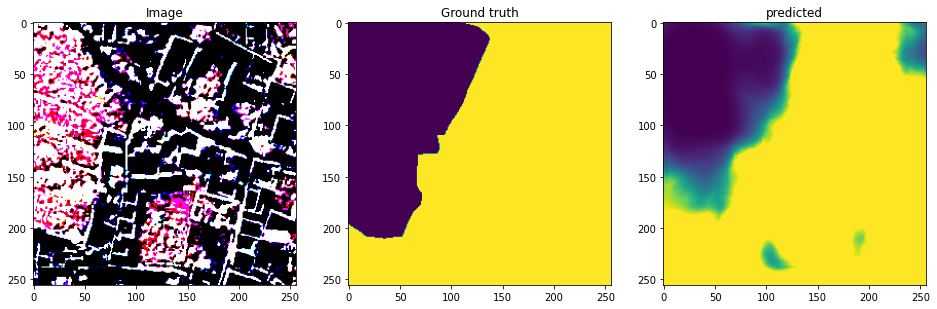

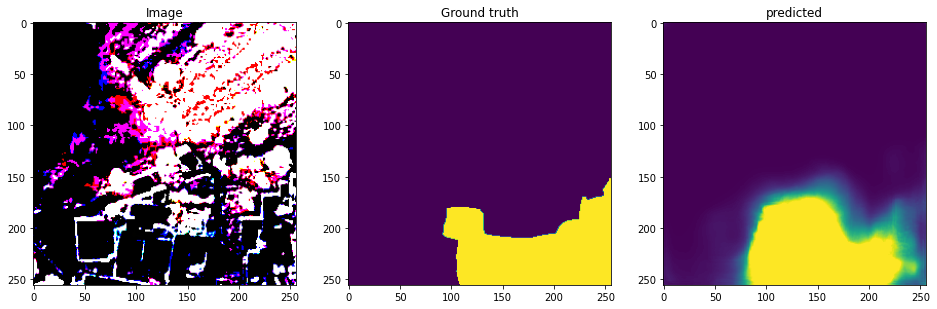

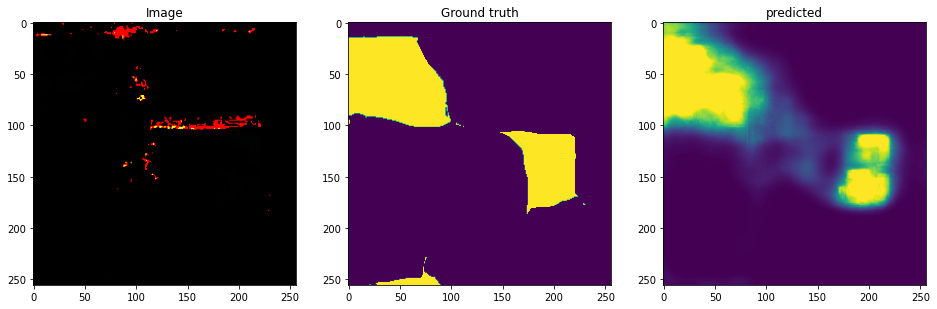

In [ ]:
#making prediction
test_predicted_masks = loaded_model.predict(np_sorted_val_x, verbose=1)

#getting random list
randomlist = random.sample(range(0, len(test_predicted_masks)), 10)

for i in randomlist:
    org = np_sorted_val_x[i]
    pred = test_predicted_masks[i]
    gt = np_sorted_val_y[i]
    pred = (pred * 255).astype(np.uint8)
    pred = np.squeeze(pred,-1)
    gt = np.squeeze(gt,-1)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.title("Image")
    plt.imshow(org.astype(np.uint8))
    plt.subplot(132)
    plt.title("Ground truth")
    plt.imshow(gt)
    plt.subplot(133)
    plt.title("predicted")
    plt.imshow(pred)
    plt.show()

**--------------------- Data ---------------------**

In [ ]:
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

COLOR_DICT = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

def adjustData(img, mask, flag_multi_class, num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i, i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    
    return (img, mask)

def trainGenerator(batch_size, train_path, image_folder, mask_folder, aug_dict, image_color_mode = "grayscale",
                    mask_color_mode = "grayscale", image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        img, mask = adjustData(img, mask, flag_multi_class, num_class)
        yield (img,mask)

def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(test_path,"%d.png"%i), as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

def geneTrainNpy(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "image",mask_prefix = "mask",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    image_arr = []
    mask_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        mask = io.imread(item.replace(image_path,mask_path).replace(image_prefix,mask_prefix),as_gray = mask_as_gray)
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        image_arr.append(img)
        mask_arr.append(mask)
    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr, mask_arr

def labelVisualize(num_class,color_dict,img):
    img = img[:, :, 0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i, :] = color_dict[i]
    return img_out / 255

def saveResult(save_path, npyfile, flag_multi_class = False, num_class = 2):
    for i, item in enumerate(npyfile):
        img = labelVisualize(num_class, COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)

**------------------For Lahore Data Experiment------------------**

In [ ]:
location_dir = os.path.join('/content/drive/My Drive', 'DeepLearning_lhr_patches')
print(location_dir)
dict_files = {}
sub_folder = []
for subdir, dirs, files in os.walk(location_dir):
  for dir_ in dirs:
    dir_path = os.path.join(location_dir, dir_)
    sub_folder.append(dir_path)
    print(dir_path)
    # dict_files[dir_] = os.listdir(os.path.join(location_dir, dir_path))

/content/drive/My Drive/DeepLearning_lhr_patches
/content/drive/My Drive/DeepLearning_lhr_patches/lhr_patches_1
/content/drive/My Drive/DeepLearning_lhr_patches/lhr_patches_2
/content/drive/My Drive/DeepLearning_lhr_patches/lhr_patches_3
/content/drive/My Drive/DeepLearning_lhr_patches/lhr_patches_4
/content/drive/My Drive/DeepLearning_lhr_patches/lhr_patches_5


In [ ]:
# !unzip "/content/drive/My Drive/LHR_dataset/lhr_patches_1-20200617T085752Z-002.zip"

# resize_and_convert('/content/lhr_patches_1', 'lhr_patches_1', 256, 256, logs=False)
sorting_train_x_1 = convert_image_to_array('/content/Processed/lhr_patches_1', logs=False)

Processed!


In [ ]:
# !unzip "/content/drive/My Drive/LHR_dataset/lhr_patches_2-20200617T093040Z-002.zip"

# resize_and_convert('/content/lhr_patches_2', 'lhr_patches_2', 256, 256, logs=False)
sorting_train_x_2 = convert_image_to_array('/content/Processed/lhr_patches_2', logs=False)

Processed!


In [ ]:
# !unzip "/content/drive/My Drive/LHR_dataset/lhr_patches_3-20200617T093047Z-002.zip"

# resize_and_convert('/content/lhr_patches_3', 'lhr_patches_3', 256, 256, logs=False)
sorting_train_x_3 = convert_image_to_array('/content/Processed/lhr_patches_3', logs=False)

Processed!


In [ ]:
# !unzip "/content/drive/My Drive/LHR_dataset/lhr_patches_4-20200617T093053Z-002.zip"

# resize_and_convert('/content/lhr_patches_4', 'lhr_patches_4', 256, 256, logs=False)
sorting_train_x_4 = convert_image_to_array('/content/Processed/lhr_patches_4', logs=False)

Processed!


In [ ]:
# !unzip "/content/drive/My Drive/LHR_dataset/lhr_patches_5-20200617T093059Z-002.zip"

# resize_and_convert('/content/lhr_patches_5', 'lhr_patches_5', 256, 256, logs=False)
sorting_train_x_5 = convert_image_to_array('/content/Processed/lhr_patches_5', logs=False)

Processed!


In [ ]:
sorting_test_x = sorting_train_x_1 + sorting_train_x_2 + sorting_train_x_3 + sorting_train_x_4 + sorting_train_x_5
print(len(sorting_test_x))

8977


In [ ]:
sorted_train_x = np.array(sorting_test_x)

#for calculating the mean and standard daviation
#converting data into float
np_sorted_train_x = sorted_train_x.astype('float32')

# === normalizing the training set
np_sorted_train_x -= mean
np_sorted_train_x /= std

In [ ]:

#making prediction
test_predicted_masks = loaded_model.predict(np_sorted_train_x, verbose=1)

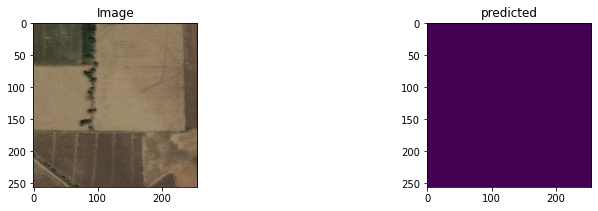

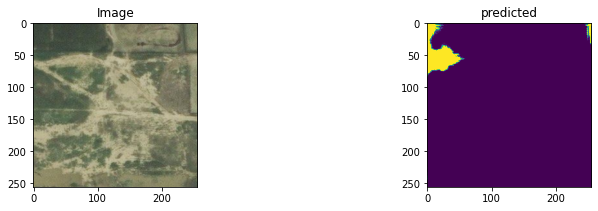

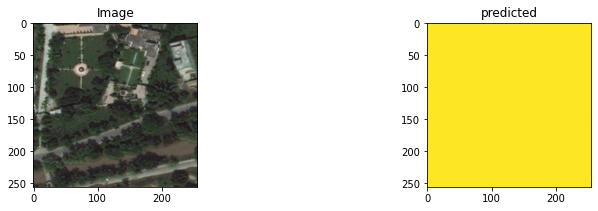

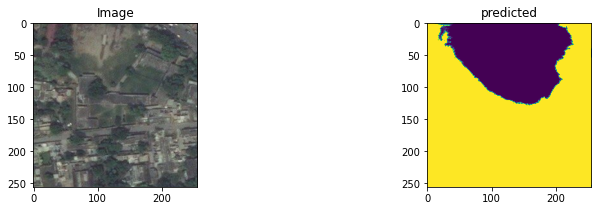

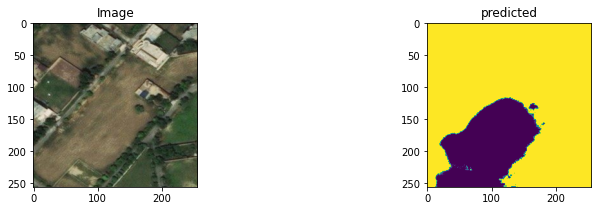

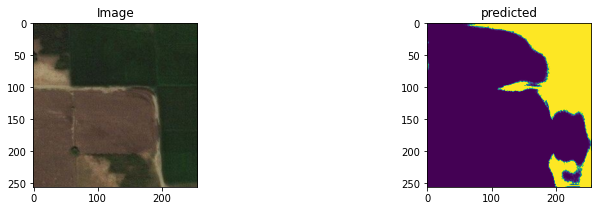

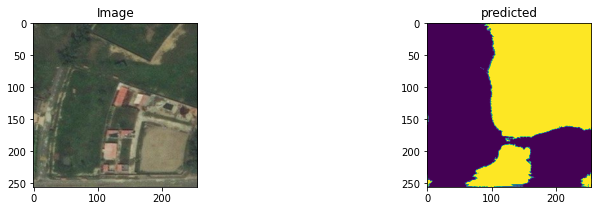

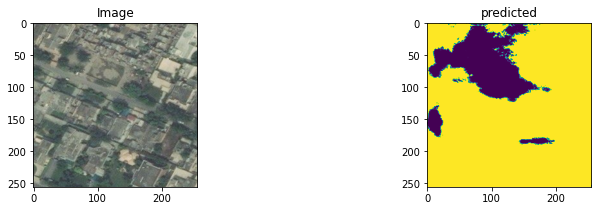

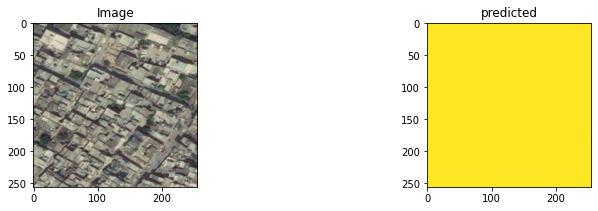

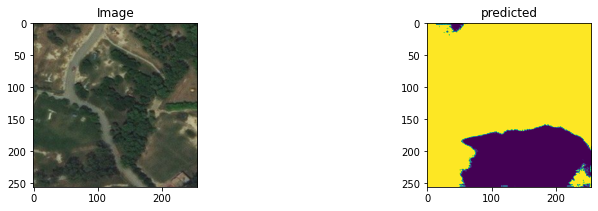

In [ ]:
#getting random list
randomlist = random.sample(range(0, len(test_predicted_masks)), 10)

for i in randomlist:
    org = sorting_test_x[i]
    pred = test_predicted_masks[i]
    
    pred = (pred * 255).astype(np.uint8)
    pred = np.squeeze(pred,-1)
    
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.title("Image")
    plt.imshow(org.astype(np.uint8))
    
    plt.subplot(133)
    plt.title("predicted")
    plt.imshow(pred)
    plt.show()

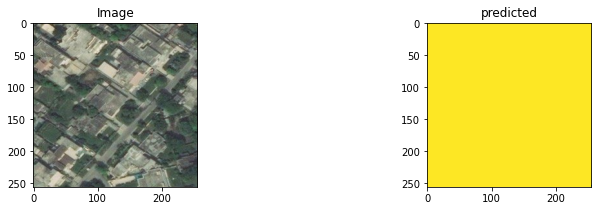

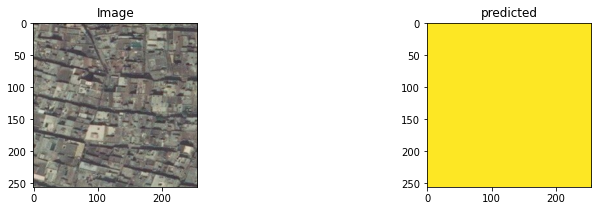

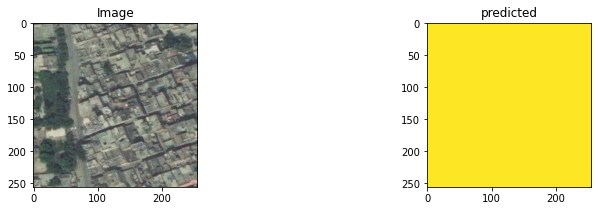

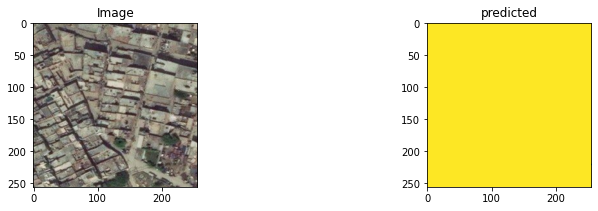

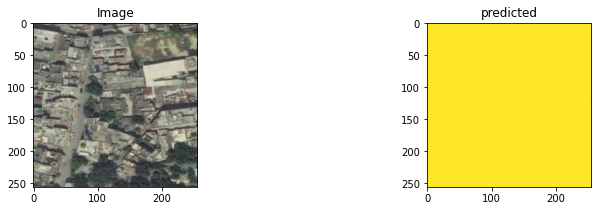

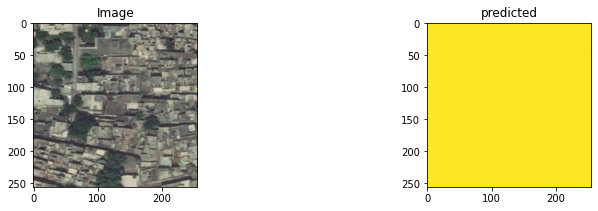

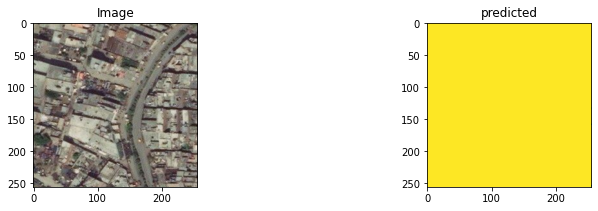

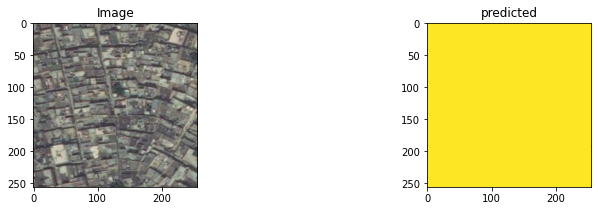

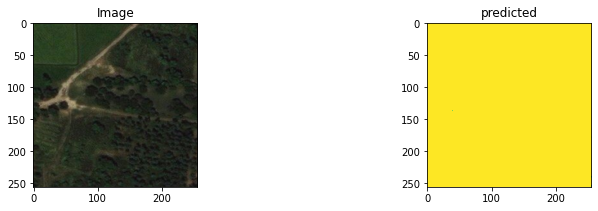

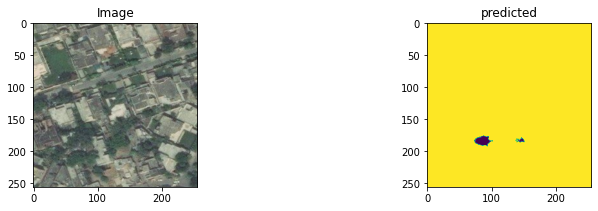

In [ ]:
results_no = []
for i in range(len(test_predicted_masks)):
  mask = test_predicted_masks[i]
  if np.mean(mask) > 0.5 and np.mean(mask) < 0.85:
    results_no.append(i)
    
#getting random list
randomlist = random.sample(results_no, 10)

for i in randomlist:
    org = sorting_test_x[i]
    pred = test_predicted_masks[i]
    
    pred = (pred * 255).astype(np.uint8)
    pred = np.squeeze(pred,-1)
    
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.title("Image")
    plt.imshow(org.astype(np.uint8))
    
    plt.subplot(133)
    plt.title("predicted")
    plt.imshow(pred)
    plt.show()

In [ ]:
#for saving the 2.5K images of the buildings
root_directory_processed_data = os.path.join('/content', 'Results')
os.mkdir(root_directory_processed_data)

In [ ]:
location_dir = os.path.join('/content', 'Processed')
dict_files = {}
sub_folder = []
for subdir, dirs, files in os.walk(location_dir):
  for dir_ in dirs:
    dir_path = os.path.join(location_dir, dir_)
    sub_folder.append(dir_path)
    print(dir_path)
    # dict_files[dir_] = os.listdir(os.path.join(location_dir, dir_path))

In [ ]:
print(len(results_no))

2147


In [ ]:
output_folder = os.path.join('/content/drive/My Drive', 'Building_Results/')
count = 0
for i in results_no:
  img = sorting_test_x[i]
  count += 1
  cv2.imwrite(os.path.join(output_folder, 'imageNo_'+ str(count) + '.png'), img.astype(np.uint8))

In [ ]:
output_folder = os.path.join('/content', 'Results')
print(os.listdir(output_folder))

['imageNo_214.png', 'imageNo_889.png', 'imageNo_858.png', 'imageNo_748.png', 'imageNo_219.png', 'imageNo_1986.png', 'imageNo_493.png', 'imageNo_381.png', 'imageNo_174.png', 'imageNo_2005.png', 'imageNo_554.png', 'imageNo_257.png', 'imageNo_575.png', 'imageNo_1974.png', 'imageNo_1147.png', 'imageNo_1149.png', 'imageNo_1717.png', 'imageNo_254.png', 'imageNo_1429.png', 'imageNo_1247.png', 'imageNo_1216.png', 'imageNo_1255.png', 'imageNo_186.png', 'imageNo_1990.png', 'imageNo_97.png', 'imageNo_180.png', 'imageNo_1079.png', 'imageNo_147.png', 'imageNo_458.png', 'imageNo_1940.png', 'imageNo_1397.png', 'imageNo_406.png', 'imageNo_1440.png', 'imageNo_192.png', 'imageNo_761.png', 'imageNo_1784.png', 'imageNo_655.png', 'imageNo_2096.png', 'imageNo_1041.png', 'imageNo_241.png', 'imageNo_1489.png', 'imageNo_1682.png', 'imageNo_527.png', 'imageNo_839.png', 'imageNo_1252.png', 'imageNo_892.png', 'imageNo_915.png', 'imageNo_2069.png', 'imageNo_1845.png', 'imageNo_2110.png', 'imageNo_991.png', 'imageN

In [ ]:
%cp -r -v '/content/Results/.' '/content/drive/My Drive/Building_Results'

'/content/Results/.' -> '/content/drive/My Drive/Building_Results'
'/content/Results/./imageNo_1.png' -> '/content/drive/My Drive/Building_Results/imageNo_1.png'
'/content/Results/./imageNo_2.png' -> '/content/drive/My Drive/Building_Results/imageNo_2.png'
'/content/Results/./imageNo_3.png' -> '/content/drive/My Drive/Building_Results/imageNo_3.png'
'/content/Results/./imageNo_4.png' -> '/content/drive/My Drive/Building_Results/imageNo_4.png'
'/content/Results/./imageNo_5.png' -> '/content/drive/My Drive/Building_Results/imageNo_5.png'
'/content/Results/./imageNo_6.png' -> '/content/drive/My Drive/Building_Results/imageNo_6.png'
'/content/Results/./imageNo_7.png' -> '/content/drive/My Drive/Building_Results/imageNo_7.png'
'/content/Results/./imageNo_8.png' -> '/content/drive/My Drive/Building_Results/imageNo_8.png'
'/content/Results/./imageNo_9.png' -> '/content/drive/My Drive/Building_Results/imageNo_9.png'
'/content/Results/./imageNo_10.png' -> '/content/drive/My Drive/Building_Resul

In [ ]:
import pandas as pd

df = pd.read_json (r'/content/FirstFourHundred.json')
df.to_csv (r'/content/FirstFourHundred.csv', index = None, header=True)

ValueError: ignored

In [ ]:
import json
import csv

#for loading all json object from a single file
data = []
with open('/content/Dareer Data.json') as f:
    for line in f:
        data.append(json.loads(line))

with open('/content/Dareer Data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["content", "High Building Density", "Moderate Building Density", "Low Building Density", "Regular Layout", "Irregular Layout", "Dense Greenery", "Sparse Greenery", "Very Sparse Greenery", "Grass", "Trees", "Large Buildings", "Exposed Soil"])
    
    #for processing the writing for csv file 
    for d in data:
      empty_array=[]

      #checking that is labels available or not
      if(d['annotation'] != None):
        #for saving images link
        empty_array.append(d['content'])
        
        labels = d['annotation']['labels']
        # print(labels)
        
        if('High Building Density (>80%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Moderate Building Density (50%-80%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Low Building Density(<50%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
                
        if('Regular Layout' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Irregular Layout' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        
        if('Dense Greenery(>50%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Sparse Greenery (10-50%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Very Sparse Greenery(<5%)' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        
        if('Grass' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Trees' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        
        if('Large Buildings' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        if('Exposed Soil' in labels):
          empty_array.append(1)
        else:
          empty_array.append(0)
        
      # print(empty_array)
      writer.writerow(empty_array)